# Synthia's notebook to experiment with the data 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *

## Load Datasets

In [2]:
NSDUH2021 = readInData("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt")
# display(NSDUH2021.head())

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2799) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


In [3]:
NSDUH2019 = readInData("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt")
# display(NSDUH2019.head())
NSDUH2019.head()

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2575) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,43295143,10/09/2020,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,6613.865847,40004,2
1,65095143,10/09/2020,2,99,99,991,9991,91,91,91,...,3.0,2,2,2,2,2,2,6321.580570,40003,1
2,49405143,10/09/2020,1,99,99,22,9999,99,4,93,...,3.0,2,2,2,2,2,2,5045.607492,40008,1
3,51015143,10/09/2020,2,99,99,991,9991,91,91,91,...,1.0,2,2,2,2,2,2,2419.558820,40031,1
4,31825143,10/09/2020,2,99,99,991,9991,91,91,91,...,3.0,2,2,2,2,2,2,575.225454,40010,2


In [4]:
NSDUH2018 = readInData("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv")
NSDUH2018.head()

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2525) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,11015143,10/08/2019,1,99,99,12,9999,99,1,20,...,3.0,2,2,1,1,2,2,20783.261908,40001,1
1,86325143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,3,3,2,2,1095.884074,40004,1
2,35425143,10/08/2019,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,374.445005,40017,2
3,98125143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,2,2,2,2,2421.263435,40038,2
4,15945143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,1,2,1,1,2,2,6637.319591,40040,2


In [5]:
CoreTrends2021 = readInData("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv")
# display(CoreTrends2021.head())

In [6]:
CoreTrends2019 = readInData("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv")
# display(CoreTrends2019.head())

In [7]:
CoreTrends2018 = readInData("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv")
display(CoreTrends2018.head())

,respid,sample,comp,int_date,lang,cregion,state,density,usr,qs1,...,inc,party,partyln,hh1,hh3,ql1,ql1a,qc1,weight,cellweight
0,1,1,1,180103,1,1,42,5,U,,...,6,2,,5,4,1,,,1.746359,
1,2,1,1,180103,1,3,45,2,S,,...,4,3,8,2,2,2,2,,1.659764,
2,3,1,1,180103,1,1,34,5,S,,...,4,1,,1,,1,,,0.490804,
3,4,1,1,180103,1,3,24,4,S,,...,2,2,,2,2,1,,,0.947965,
4,5,1,1,180103,1,1,33,2,R,,...,7,1,,3,3,1,,,0.915959,


## Clean up data


###ADMT16 - ADMT21  : How many visits to various types of outpatient facilities for mental health

<br>AGE3: age (intervals of 2, e.g. 1 = age 12 or 13, up to age 65)
<br>IRSEX: gender 1=male, 2=female

<br>ADMT01 : AUINPYR : stayed in hospital for mental health
<br>ADMT25/ADMTREF25 : AURXYR : taken any medication for mental health

<br>YE09 : YEATNDYR : HAs attended some sort of school
<br>YE10 : YESCHFLT : how much they like going to school (1-4, 4=hated it)
<br>YE23b : YEPRBSLV : participated in self-esteem group

<br>NERVE30 : DSTNRV30 : How often felt nervous (1-5, 5=never) in past 30 days
<br>HOPE30 : DSTHOP30 : How often feel hopeless
<br>NOCHR30 : DSTCHR30 : How often felt depressed
<br>DOWN30 : DSTNGD30 : How often feeling down/worthless
<br>WORST30 : DSTWORST : In past year has there been a worse month than current (1-2, 2=No)
<br>DSNERV1 : DSTNRV12 : in WORST30 month, how often felt nervous
<br>DSHOPE : DSTHOP12 : In WORST30 month, how often felt hopeless
<br>DSNOCHR : DSTCHR12 : in WORST30 month, how often felt depressed
<br>DSDOWN : DSTNGD12 : in WORST30 month, how often felt worthless

<br>LICONCEN : IMPCONCN : Difficulty concentrating in their worst month (1-4, 4= severe)
<br>LIGOOUT1 : IMPGOUT : Difficulty leaving house
<br>LISTRAN1 : IMPPEOP : Difficulty dealing with less known people
<br>LISOC1 : IMPSOC : Difficulty participating in social activites
<br>LISOC2 : IMPSOCM : Did mental health problems keep from participating socially

<br>SUI01 : SUICTHNK : Think about suicide in past year
<br>SUI02 : SUIPLANYR :  Plans for suicide

<br>ASC21 : ADDPREV : Long periods of feeling sad


In [8]:
cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]

NSDUH2021_wantedCols = getWantedColumns(NSDUH2021, cols)

In [9]:
#Removed "SUIPLANYR" because its not present
cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]

NSDUH2019_wantedCols = getWantedColumns(NSDUH2019, cols)
NSDUH2019_wantedCols.columns

Index(['AGE2', 'IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'],
      dtype='object')

In [10]:
NSDUH2018_wantedCols = getWantedColumns(NSDUH2018, cols)


Core trends variables:

web1a    -	Twitter
web1b    -	Instagram
web1c    -	Facebook 
web1d    -	Snapchat
web1e    -	YouTube

How often use social media, 1-5, 5=less often

sns2a    -	Twitter
sns2b    -	Instagram
sns2c    -	Facebook 
sns2d    -	Snapchat
sns2e    -	YouTube

gender  - gender
age     - age



In [11]:
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]

CoreTrends2021_wantedCols = getWantedColumns(CoreTrends2021, CoreTrends2021Cols)

In [12]:
CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2019_wantedCols = getWantedColumns(CoreTrends2019, CoreTrends2019Cols)

In [17]:
# CoreTrends2018Cols = ["respid", "web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2018_wantedCols = getWantedColumns(CoreTrends2018, CoreTrends2018Cols)

In [14]:
CoreTrends2018_wantedCols.head()

,web1a,web1b,web1c,web1d,web1e,sns2a,sns2b,sns2c,sns2d,sns2e,sex,age
0,2,1,1,1,1,,1,1,3,3,2,33
1,2,2,2,2,2,,,,,,2,76
2,2,2,2,2,2,,,,,,2,99
3,2,2,1,2,2,,,3,,,2,60
4,2,2,1,2,1,,,3,,2,1,55


In [32]:
NSDUH2018_wantedCols.columns

Index(['AGE2', 'IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'],
      dtype='object')

In [30]:
NSDUH2018_wantedCols = cleanUpNSDUH(NSDUH2018_wantedCols)

NameError: name 'cleanUpNSDUH' is not defined

In [33]:
longForm_NSDUH2018 = pd.melt(NSDUH2018_wantedCols, id_vars=['AGE2'], value_vars=['IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'])

In [ ]:
print(longForm_NSDUH2018)

In [ ]:
print(NSDUH2018_wantedCols.columns)
print(CoreTrends2018_wantedCols.columns)
CoreTrends2018_wantedCols.shape

Index(['AGE2', 'IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'],
      dtype='object')
Index(['web1a', 'web1b', 'web1c', 'web1d', 'web1e', 'sns2a', 'sns2b', 'sns2c',
       'sns2d', 'sns2e', 'sex', 'age'],
      dtype='object')


(2002, 12)

Map the ages from CoreTrends to match the age ranges in NSDUH for simplicity

In [ ]:
age_mapping_CoreToNSDUH2018 = { 12: 1, 13: 2, 14: 3, 15: 4, 16: 5, 17: 6, 18: 7, 19: 8, 20: 9, 21: 10, 22: 11, 23: 11, 24: 12, 25: 12, 
                                   **{age: 13 for age in range(26, 30)}, **{age: 14 for age in range(30, 35)}, **{age: 15 for age in range(35, 50)}, **{age: 16 for age in range(50, 65)}, **{age: 17 for age in range(65, 100)}}
CoreTrends2018_wantedCols['age'] = CoreTrends2018_wantedCols['age'].map(age_mapping_CoreToNSDUH2018)
CoreTrends2018_wantedCols['age']  = CoreTrends2018_wantedCols['age'].astype('Int64')

In [ ]:
NSDUH2018_wantedCols['AGE2']  = NSDUH2018_wantedCols['AGE2'].astype('Int64')

In [ ]:
CoreTrends2018_wantedCols.shape

(2002, 12)

In [ ]:
merged_2018 = convertAndMergeCoreTrendstoNSDUH(CoreTrends2018_wantedCols, NSDUH2018_wantedCols, 2018)

In [ ]:
merged_2018.shape

(4104429, 35)

In [ ]:
merged_2019 = convertAndMergeCoreTrendstoNSDUH(CoreTrends2019_wantedCols, NSDUH2019_wantedCols, 2019)

In [ ]:
merged_2021 = convertAndMergeCoreTrendstoNSDUH(CoreTrends2021_wantedCols, NSDUH2021_wantedCols, 2021)

In [ ]:
merged_2018.head()
merged_2018.shape

(4104429, 35)

In [ ]:
merged_2018['average_SM_use'] = merged_2018[['sns2a', 'sns2b', 'sns2c','sns2d']].sum(axis=1, skipna=True)
merged_2019['average_SM_use'] = merged_2019[['sns2a', 'sns2b', 'sns2c','sns2d']].sum(axis=1, skipna=True)
merged_2021['average_SM_use'] = merged_2021[['sns2a', 'sns2b', 'sns2c','sns2d']].sum(axis=1, skipna=True)


In [ ]:
merged_2018 = merged_2018.dropna(subset=['average_SM_use', 'AGE2'])
merged_2019 = merged_2019.dropna(subset=['average_SM_use', 'AGE2'])
merged_2021 = merged_2021.dropna(subset=['average_SM_use', 'AGE3'])

In [ ]:
merged_2018_SMUseAge = merged_2018[['age', 'average_SM_use']]
merged_2019_SMUseAge = merged_2019[['age', 'average_SM_use']]
merged_2021_SMUseAge = merged_2021[['age', 'average_SM_use']]

In [ ]:
merged_2018_SMUseAge = merged_2018_SMUseAge.dropna()
merged_2019_SMUseAge = merged_2019_SMUseAge.dropna()
merged_2021_SMUseAge = merged_2021_SMUseAge.dropna()

In [ ]:
average_use_by_age2018 = merged_2018_SMUseAge.groupby('age')['average_SM_use'].mean()
average_use_by_age2019 = merged_2019_SMUseAge.groupby('age')['average_SM_use'].mean()
average_use_by_age2021 = merged_2021_SMUseAge.groupby('age')['average_SM_use'].mean()

In [ ]:
# merged_20182019 = pd.merge(merged_2018_SMUseAge, merged_2019_SMUseAge, left_on='age', right_on='age', how='left')
# merged_allYears = pd.merge(merged_20182019, merged_2021_SMUseAge, left_on='age', right_on='age', how='left')


In [ ]:
# plt.plot(merged_2018_SMUseAge['age'], merged_2018_SMUseAge['average_SM_use'], label="2018")
# plt.plot(merged_2019_SMUseAge['age'], merged_2019_SMUseAge['average_SM_use'], label="2019")
# plt.plot(merged_2021_SMUseAge['age'], merged_2021_SMUseAge['average_SM_use'], label="2021")

average_use_by_age2018_df = average_use_by_age2018.reset_index()
average_use_by_age2019_df = average_use_by_age2019.reset_index()
average_use_by_age2021_df = average_use_by_age2021.reset_index()

average_use_by_age2018_df['dataset'] = '2018'
average_use_by_age2019_df['dataset'] = '2019'
average_use_by_age2021_df['dataset'] = '2021'

combined_df = pd.concat([average_use_by_age2018_df, average_use_by_age2019_df, average_use_by_age2021_df])

print(combined_df)


    age  average_SM_use dataset
0     1        5.203390    2018
1     2        4.256410    2018
2     3        3.971831    2018
3     4        3.665803    2018
4     5        2.928309    2018
5     6        2.024221    2018
0     7        5.037037    2019
1     8        4.052632    2019
2     9        5.000000    2019
3    10        6.157895    2019
4    11        4.378378    2019
5    12        4.790698    2019
6    13        4.000000    2019
7    14        4.377551    2019
8    15        3.875421    2019
9    16        3.021226    2019
10   17        1.794183    2019
0     4        4.806452    2021
1     5        5.811321    2021
2     6        4.500000    2021
3     7        5.150943    2021
4     8        4.414634    2021
5     9        3.931034    2021
6    10        3.331461    2021
7    11        1.985537    2021


<Axes: xlabel='age', ylabel='average_SM_use'>

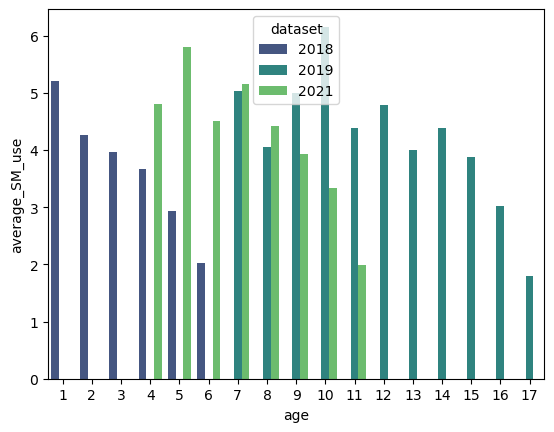

In [ ]:
sns.barplot(data=combined_df, x='age', y='average_SM_use', hue='dataset' ,palette='viridis')


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

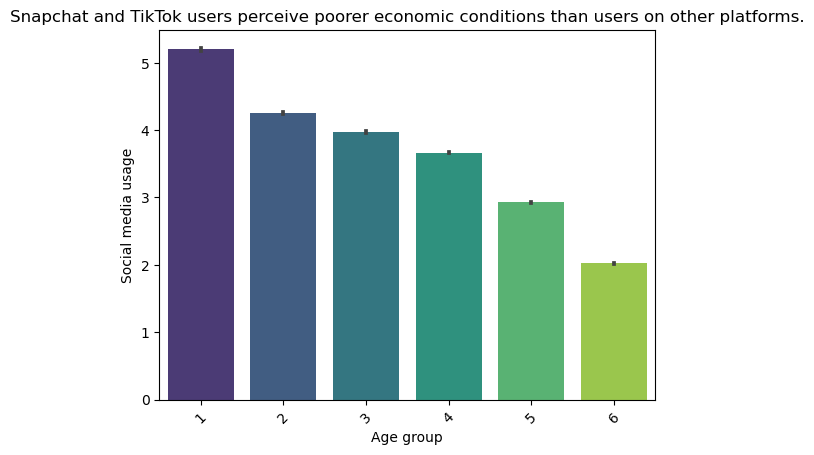

In [ ]:
sns.barplot(data=merged_2018, x='AGE2', y='average_SM_use',palette='viridis')
plt.xlabel("Age group")
plt.ylabel("Social media usage")
plt.title("Snapchat and TikTok users perceive poorer economic conditions than users on other platforms.")
plt.xticks(rotation=45)